In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

# Download the dataset
print("Downloading dataset...")
path = kagglehub.dataset_download("dwiuzila/titanic-machine-learning-from-disaster")
print("Path to dataset files:", path)

# Load the CSV file (Adjusting path based on your previous code)
# Note: We usually train on 'train.csv', but based on your file, we look for the file with 'Survived' column.
# Let's try loading the specific file you referenced.
csv_path = f"{path}/test.csv"
try:
    df = pd.read_csv(csv_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    # Fallback if file name differs
    import os
    files = os.listdir(path)
    csv_path = os.path.join(path, files[0])
    df = pd.read_csv(csv_path)
    print(f"Loaded {files[0]} instead.")

df.head()

Using Colab cache for faster access to the 'titanic-machine-learning-from-disaster' dataset.
Path to dataset files: /kaggle/input/titanic-machine-learning-from-disaster
Data loaded successfully.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [7]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)
df = df.dropna(subset=['Embarked'])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
print(df)
print("Data is now clean and numeric:")
df.head()

     Pclass  Sex   Age  SibSp  Parch      Fare  Survived  Embarked_Q  \
0         3    0  34.5      0      0    7.8292         0        True   
1         3    1  47.0      1      0    7.0000         1       False   
2         2    0  62.0      0      0    9.6875         0        True   
3         3    0  27.0      0      0    8.6625         0       False   
4         3    1  22.0      1      1   12.2875         1       False   
..      ...  ...   ...    ...    ...       ...       ...         ...   
413       3    0  27.0      0      0    8.0500         0       False   
414       1    1  39.0      0      0  108.9000         1       False   
415       3    0  38.5      0      0    7.2500         0       False   
416       3    0  27.0      0      0    8.0500         0       False   
417       3    0  27.0      1      1   22.3583         1       False   

     Embarked_S  
0         False  
1          True  
2         False  
3          True  
4          True  
..          ...  
413      

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,True,False
1,3,1,47.0,1,0,7.0000,1,False,True
2,2,0,62.0,0,0,9.6875,0,True,False
3,3,0,27.0,0,0,8.6625,0,False,True
4,3,1,22.0,1,1,12.2875,1,False,True


In [8]:

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.7857142857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84        52
           1       0.82      0.56      0.67        32

    accuracy                           0.79        84
   macro avg       0.80      0.74      0.75        84
weighted avg       0.79      0.79      0.78        84



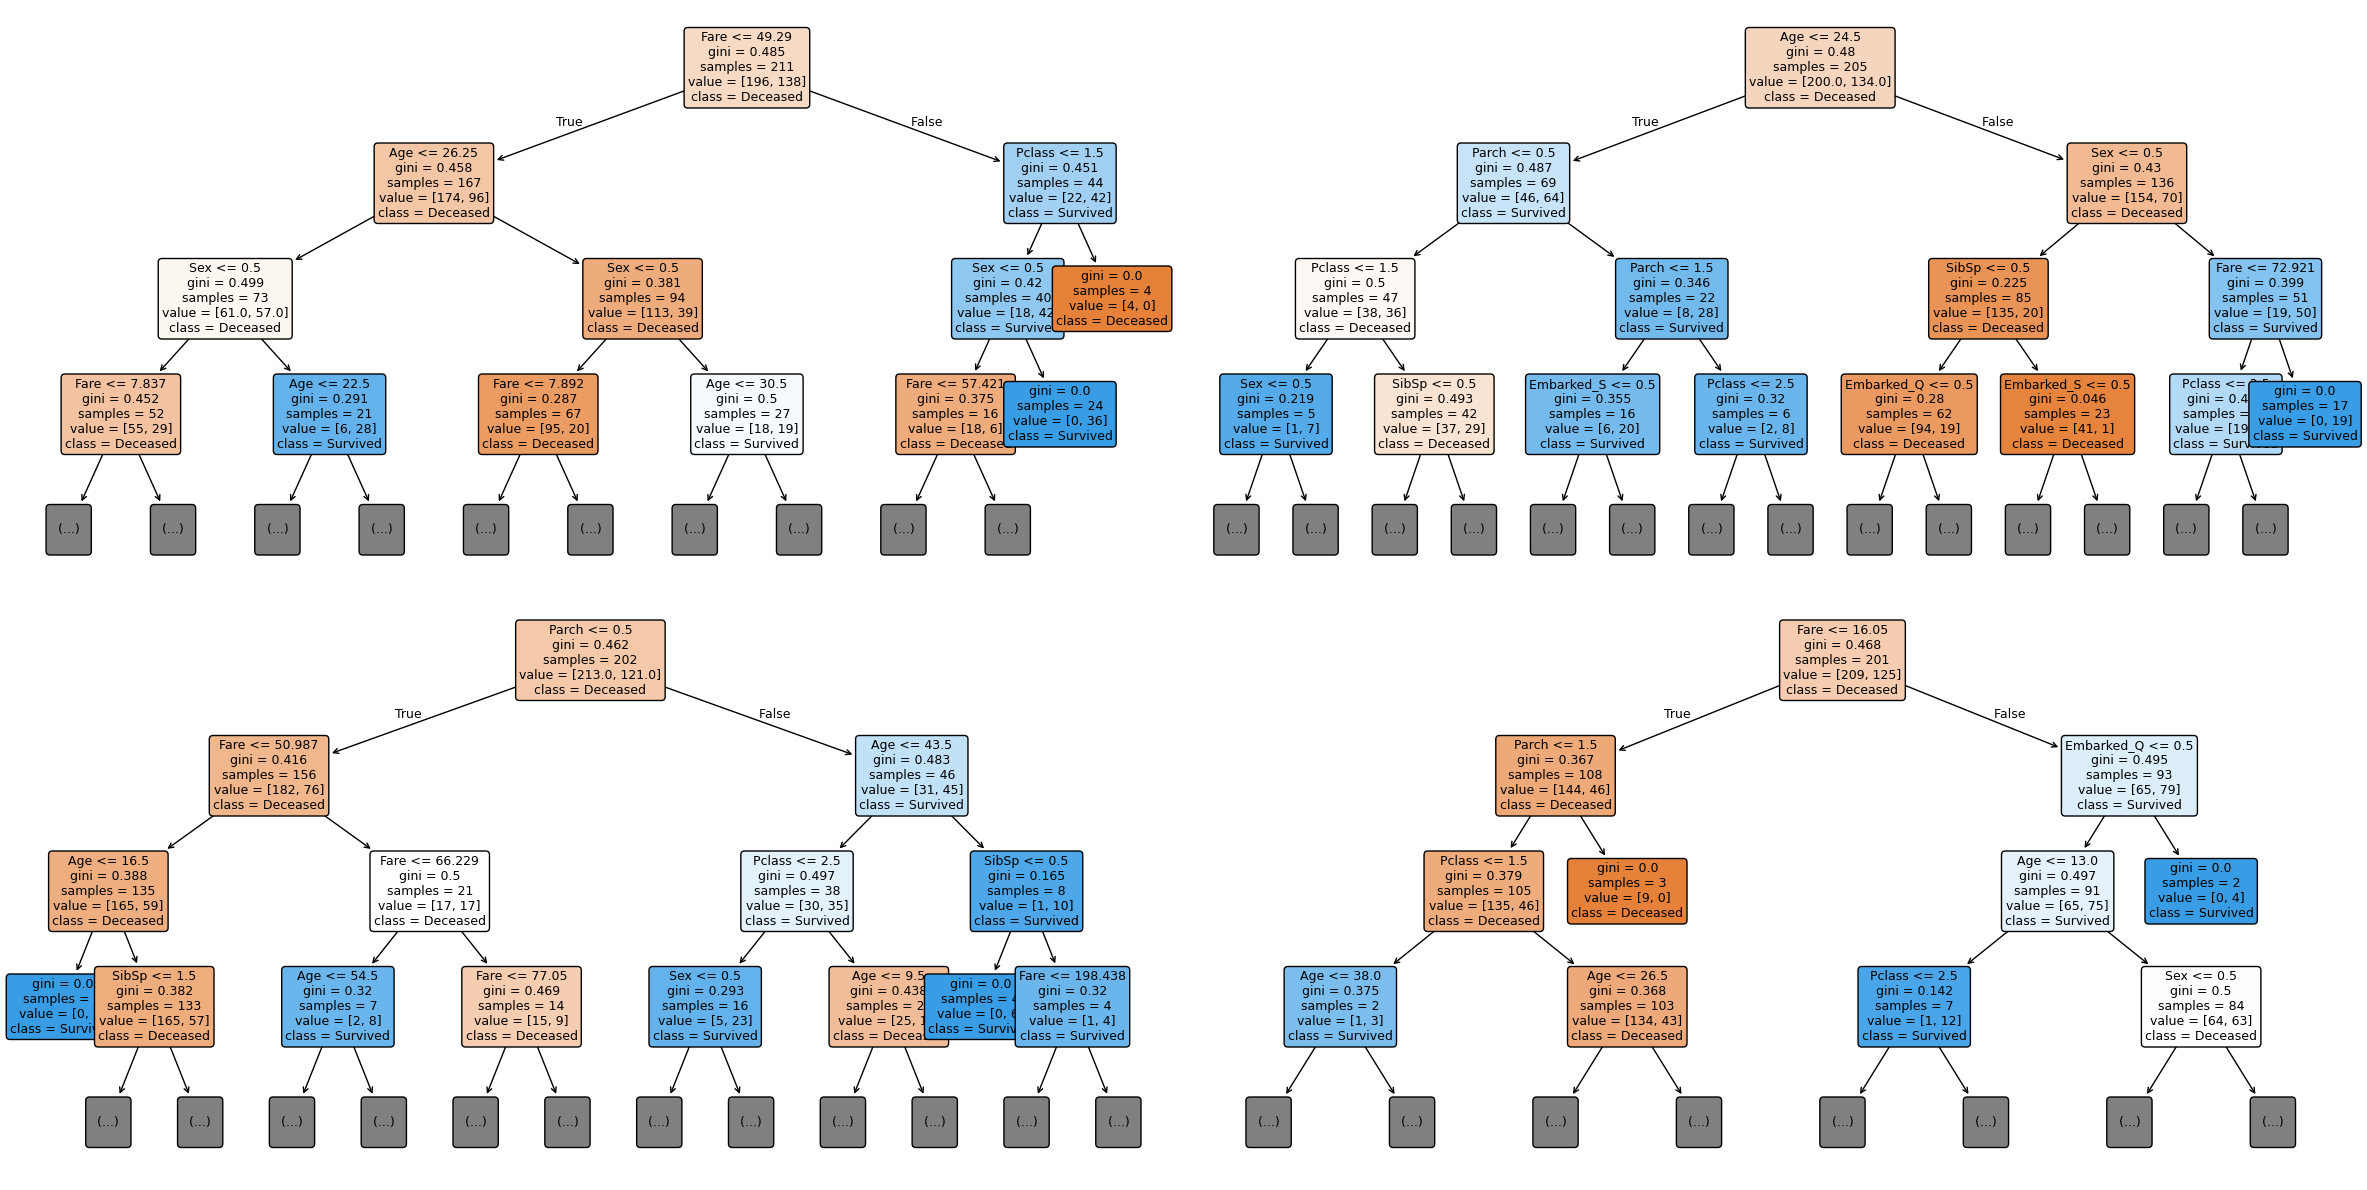

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12), dpi=100)
for index in range(4):
    row = index // 2
    col = index % 2

    # Plot the specific tree
    plot_tree(rf_model.estimators_[index],
              feature_names=X.columns,
              class_names=['Deceased', 'Survived'],
              filled=True,
              rounded=True,
              fontsize=9,
              max_depth=3,
              ax=axes[row, col])
    axes[row, col]

plt.tight_layout()
plt.show()